In [1]:
import re
import requests
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, MaxNLocator
from matplotlib.colors import Normalize, PowerNorm
from matplotlib.patches import Patch
# import seaborn as sns
# sns.set(font_scale=1.2)

%matplotlib inline

In [2]:
def get_df(athlete_id: int):
    athlete_url = f'https://www.parkrun.ru/results/athleteeventresultshistory/?athleteNumber={athlete_id}&eventNumber=0'
    page_all_results = requests.get(athlete_url, headers={'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:86.0) Gecko/20100101 Firefox/86.0'})
    df = pd.read_html(page_all_results.text)[2]
    df['Номер пробежки'] = df['Номер пробежки'].apply(int)
    df['Место'] = df['Место'].apply(int)
    df['time'] = df['Время'].transform(lambda time: sum(x * int(t) for x, t in zip([1/60, 1, 60], time.split(':')[::-1])))
    return df

In [3]:
my_id = 875743
my_df = get_df(my_id)

In [4]:
my_df['Год'] = pd.to_datetime(my_df['Дата parkrun'], dayfirst=True).dt.year
my_df['Месяц'] = pd.to_datetime(my_df['Дата parkrun'], dayfirst=True).dt.month_name(locale='ru_RU.UTF-8').str.slice(stop=3)
my_df

,Паркран,Дата parkrun,Номер пробежки,Место,Время,Рейтинг,ЛР?,time,Год,Месяц
0,Kuzminki,24/04/2021,207,21,23:09,58.10%,NaN,23.150000,2021,Апр
1,Tula Central,23/01/2021,178,2,20:00,67.25%,NaN,20.000000,2021,Янв
2,Tula Central,16/01/2021,177,1,20:11,66.64%,NaN,20.183333,2021,Янв
3,Tula Central,09/01/2021,176,2,19:52,67.70%,NaN,19.866667,2021,Янв
4,Tula Central,02/01/2021,174,1,21:39,62.12%,NaN,21.650000,2021,Янв
...,...,...,...,...,...,...,...,...,...,...
180,Gorky Park,25/10/2014,25,1,18:07,71.76%,NaN,18.116667,2014,Окт
181,Kolomenskoe,22/03/2014,4,2,19:14,67.42%,NaN,19.233333,2014,Мар
182,Kolomenskoe,15/03/2014,3,10,20:01,64.78%,NaN,20.016667,2014,Мар
183,Kolomenskoe,08/03/2014,2,2,18:59,68.31%,NaN,18.983333,2014,Мар


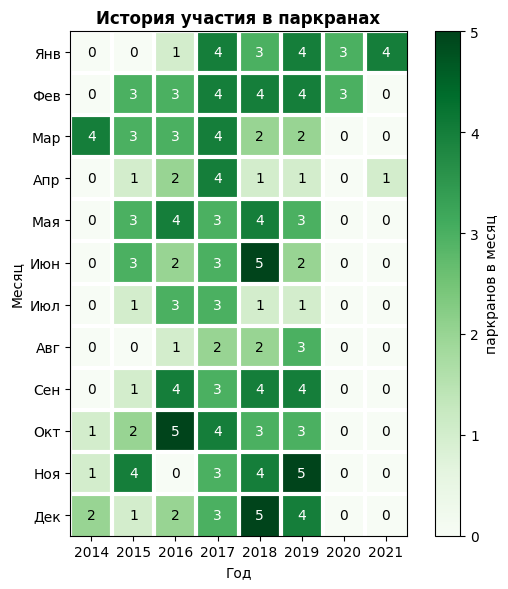

CPU times: user 3.38 s, sys: 3.48 s, total: 6.85 s
Wall time: 11.7 s


In [61]:
%%time
rundata_long = my_df.pivot_table(index='Месяц', columns='Год', values='Время', aggfunc=len, fill_value=0).astype(int)
months = ['Янв','Фев','Мар','Апр','Мая','Июн','Июл','Авг','Сен','Окт','Ноя','Дек']
for month in months:
    if month not in rundata_long.index.values:
        rundata_long.loc[month] = 0
# sort chronological
rundata_long = rundata_long.reindex(months)
n_years = rundata_long.shape[1]
fig = plt.figure(figsize=(6, 6), dpi=100)
ax = plt.gca(xlabel='Год', ylabel='Месяц')
im = ax.imshow(rundata_long, cmap="Greens")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('паркранов в месяц', rotation=90, va='top')
# Setting minor grid
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.set_xticks([i-.5 for i in range(n_years)], minor=True)
ax.set_yticks([i-.5 for i in range(12)], minor=True)
ax.tick_params(which="minor", bottom=False, left=False)
# Setting the labels
ax.set_xticks(list(range(n_years)))
ax.set_yticks(list(range(12)))
# Labeling respective list entries
ax.set_xticklabels(rundata_long.columns.values)
ax.set_yticklabels(months)
# Creating text annotations
for i in range(12):
    for j in range(n_years):
        val = rundata_long.iloc[i, j]
        ax.text(j, i, val, ha="center", va="center", color='w' if val > 2 else 'k')
ax.set_title("История участия в паркранах", fontweight='bold')
fig.tight_layout()
plt.show()

In [5]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Паркран         185 non-null    object 
 1   Дата parkrun    185 non-null    object 
 2   Номер пробежки  185 non-null    int64  
 3   Место           185 non-null    int64  
 4   Время           185 non-null    object 
 5   Рейтинг         185 non-null    object 
 6   ЛР?             22 non-null     object 
 7   time            185 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 11.7+ KB


In [6]:
vizavi_df = get_df(875431)

In [7]:
vizavi_df

,Паркран,Дата parkrun,Номер пробежки,Место,Время,Рейтинг,ЛР?,time
0,Kuzminki,24/04/2021,207,15,21:39,59.58%,NaN,21.650000
1,Kuzminki,17/04/2021,206,53,23:54,53.97%,NaN,23.900000
2,Kuzminki,10/04/2021,205,1,17:03,75.66%,NaN,17.050000
3,Kuzminki,03/04/2021,204,17,22:31,57.29%,NaN,22.516667
4,Kuzminki,14/03/2020,203,49,23:24,55.13%,NaN,23.400000
...,...,...,...,...,...,...,...,...
106,Kuzminki,23/07/2016,6,4,18:32,70.32%,NaN,18.533333
107,Kuzminki,18/06/2016,1,3,17:03,76.44%,NaN,17.050000
108,Gorky Park,15/08/2015,67,2,17:24,75.77%,ЛР,17.400000
109,Gorky Park,01/08/2015,65,2,17:44,74.34%,NaN,17.733333


In [8]:
battle_df = pd.merge(my_df, vizavi_df, on=['Дата parkrun', 'Паркран'])
battle_df['time_diff'] = battle_df['time_x'] - battle_df['time_y']

In [9]:
wins = battle_df['time_x'] < battle_df['time_y']
cor = pd.value_counts(wins)

In [10]:
len(battle_df)

51

In [11]:
battle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Паркран           51 non-null     object 
 1   Дата parkrun      51 non-null     object 
 2   Номер пробежки_x  51 non-null     int64  
 3   Место_x           51 non-null     int64  
 4   Время_x           51 non-null     object 
 5   Рейтинг_x         51 non-null     object 
 6   ЛР?_x             4 non-null      object 
 7   time_x            51 non-null     float64
 8   Номер пробежки_y  51 non-null     int64  
 9   Место_y           51 non-null     int64  
 10  Время_y           51 non-null     object 
 11  Рейтинг_y         51 non-null     object 
 12  ЛР?_y             1 non-null      object 
 13  time_y            51 non-null     float64
 14  time_diff         51 non-null     float64
dtypes: float64(3), int64(4), object(8)
memory usage: 6.4+ KB


In [29]:
xlsx_df = battle_df.iloc[:, [0,1,3,4,6,9,10,12]]
xlsx_df.rename(columns={
    'Место_x': 'Ваше место', 
    'Время_x': 'Ваше время', 
    'ЛР?_x': 'Личник?', 
    'Место_y': 'Место ', 
    'Время_y': 'Время ', 
    'ЛР_?': 'Личник?'}, inplace=True)
# xlsx_df.to_excel("output.xlsx", index=False, sheet_name='Сравнение результатов')

In [30]:
for i, row in battle_df.iterrows():
    print(i, row['Дата parkrun'], row['Время_x'], row['Время_y'], row['Паркран'], sep='\t')

0	24/04/2021	23:09	21:39	Kuzminki
1	21/12/2019	18:43	20:59	Kuzminki
2	14/12/2019	18:08	23:22	Kuzminki
3	30/11/2019	17:51	20:21	Kuzminki
4	23/11/2019	17:52	19:37	Kuzminki
5	09/11/2019	17:08	16:47	Kuzminki
6	02/11/2019	17:37	19:04	Kuzminki
7	26/10/2019	17:27	16:38	Kuzminki
8	12/10/2019	17:38	16:09	Kuzminki
9	28/09/2019	17:26	16:45	Kuzminki
10	07/09/2019	21:02	16:43	Kuzminki
11	18/05/2019	25:13	22:29	Kuzminki
12	04/05/2019	17:44	23:27	Kuzminki
13	20/04/2019	19:33	25:00	Kuzminki
14	27/10/2018	17:22	28:15	Kuzminki
15	20/10/2018	23:08	23:16	Kuzminki
16	13/10/2018	17:40	25:42	Kuzminki
17	29/09/2018	17:32	25:40	Kuzminki
18	22/09/2018	33:01	28:17	Kuzminki
19	15/09/2018	17:36	28:36	Kuzminki
20	08/09/2018	17:59	26:37	Kuzminki
21	25/08/2018	17:06	26:12	Kuzminki
22	11/08/2018	17:16	16:41	Kuzminki
23	30/06/2018	17:21	27:49	Kuzminki
24	16/06/2018	30:39	16:35	Kuzminki
25	09/06/2018	17:16	22:14	Kuzminki
26	07/01/2018	17:50	24:37	Kuzminki
27	30/12/2017	17:49	23:17	Kuzminki
28	02/12/2017	18:54	24:03	Kuzm

In [13]:
battle_df['time_diff'].sum()

-60.05000000000004

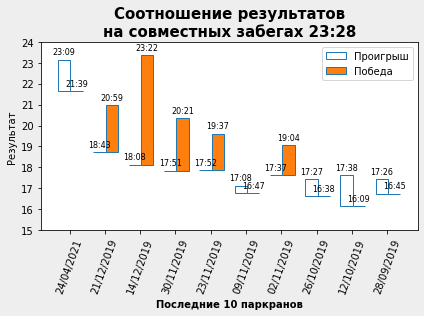

In [14]:
battle_df = battle_df.head(10)
def label_bars(marks, heights, rects):
    for mark, height, rect in zip(marks, heights, rects):
        ax.annotate(f'{mark}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset.
                    textcoords='offset points',
                    ha='center', va='bottom', size=8, clip_on=True)

fig = plt.figure(figsize=(9, 6))
fig.patch.set_facecolor('#eeeeee')
ax = fig.add_subplot()

xlabels = battle_df['Дата parkrun']
x = xlabels.index
ax.set_xticks(x)
ax.set_xticklabels(xlabels, rotation=70)
spacing = 0.3  # spacing between hat groups
width = (1 - spacing) / 2
heights0 = battle_df['time_x'].combine(battle_df['time_y'], min)
rects = ax.bar(x - spacing/2, battle_df['time_x'] - heights0, width, bottom=heights0, label='Проигрыш', fill=False, edgecolor='#1f77b4')
label_bars(battle_df['Время_x'], battle_df['time_x'], rects)
rects = ax.bar(x + 0.5 - spacing, battle_df['time_y'] - heights0, width, bottom=heights0, label='Победа', edgecolor='#1f77b4')
label_bars(battle_df['Время_y'], battle_df['time_y'], rects)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Последние 10 паркранов', fontweight='bold')
ax.set_ylabel('Результат')
ax.set_ylim(int(min(battle_df['time_x'].min(), battle_df['time_y'].min()))-1, 
int(max(battle_df['time_x'].max(), battle_df['time_y'].max()))+1)
ax.set_title(f'Соотношение результатов\nна совместных забегах {cor[True]}:{cor[False]}', size=15, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.savefig('battle.png')

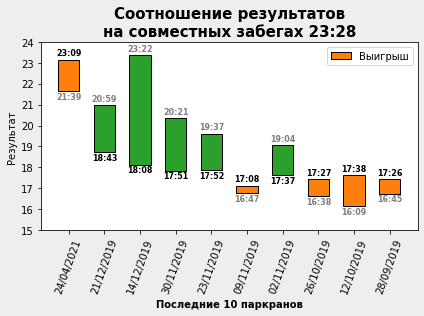

In [16]:
battle_df = battle_df.head(10)
def label_bars(marks, heights, rects, wins, color):
    for mark, height, rect, win in zip(marks, heights, rects, wins):
        ax.annotate(f'{mark}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -10 if win else 2),  # 3 points vertical offset.
                    textcoords='offset points',
                    ha='center', va='bottom', size=8, color=color, fontweight='bold')

fig = plt.figure(figsize=(6, 4.5))
fig.patch.set_facecolor('#eeeeee')
ax = fig.add_subplot()

xlabels = battle_df['Дата parkrun']
x = xlabels.index
ax.set_xticks(x)
ax.set_xticklabels(xlabels, rotation=70)
spacing = 0.3  # spacing between hat groups
width = (1 - spacing) / 2
heights0 = battle_df['time_x'].combine(battle_df['time_y'], min)
heights1 = battle_df['time_x'].combine(battle_df['time_y'], max)

rects = ax.bar(x, heights1 - heights0, 0.6, bottom=heights0, label='Выигрыш', edgecolor='black', color=wins.where(wins, '#ff7f0e').where(~wins, '#2ca02c'))
label_bars(battle_df['Время_y'], battle_df['time_y'], rects, ~wins, '#7f7f7f')
label_bars(battle_df['Время_x'], battle_df['time_x'], rects, wins, 'black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Последние 10 паркранов', fontweight='bold')
ax.set_ylabel('Результат')
ax.set_ylim(int(min(battle_df['time_x'].min(), battle_df['time_y'].min()))-1, 
int(max(battle_df['time_x'].max(), battle_df['time_y'].max()))+1)
ax.set_title(f'Соотношение результатов\nна совместных забегах {cor[True]}:{cor[False]}', size=15, fontweight='bold')
ax.legend()

plt.tight_layout()
# plt.savefig('battle.png')

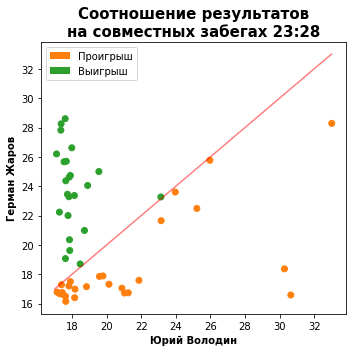

In [25]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.scatter(battle_df['time_x'], battle_df['time_y'], c=wins.where(wins, '#ff7f0e').where(~wins, '#2ca02c'))
plt.plot([17, 33], [17, 33], color='r', alpha=0.5)
ax.set_xlabel('Юрий Володин', fontweight='bold')
ax.set_ylabel('Герман Жаров', fontweight='bold')
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.set_title(f'Соотношение результатов\nна совместных забегах {cor[True]}:{cor[False]}', size=15, fontweight='bold')
legend_elements = [Patch(facecolor='#ff7f0e', label='Проигрыш'),
                       Patch(facecolor='#2ca02c', label='Выигрыш')]
ax.legend(handles=legend_elements)
plt.tight_layout()
plt.show()